In [1]:
#Import libraries for analysis
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper', font_scale = 1.2)

#Read CSV file
df = pd.read_csv ('D:\data analytic\project\porfolioProject\Actual Project\Dataset\TitanicDataset.csv')

In [2]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
#Check the data type of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
#Check the percentage of missing value on each columns
for col in df.columns:
    percentage_miss = df[col].isnull().mean()
    print ('{} - {:.10%}'.format(col, percentage_miss)) 
#Only "Age" and "Cabin" have the missing values

PassengerId - 0.0000000000%
Survived - 0.0000000000%
Pclass - 0.0000000000%
Name - 0.0000000000%
Sex - 0.0000000000%
Age - 20.5741626794%
SibSp - 0.0000000000%
Parch - 0.0000000000%
Ticket - 0.0000000000%
Fare - 0.2392344498%
Cabin - 78.2296650718%
Embarked - 0.0000000000%


In [5]:
#Check the duplicates
#I don't want to accidentally delete any important data in the original dataset. So, I create the copy and then clean this copy.
df_copy = df.copy() 
df_copy = df_copy.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
#The data has no duplicate

In [9]:
#Check if there are any inconsistent values in "sex"
df_copy.groupby('Sex').count()
#There is no inconsistent

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,152,152,152,152,127,152,152,152,152,44,152
male,266,266,266,266,205,266,266,266,265,47,266


In [10]:
#Check if there are any inconsistent values in "Embarked"
df_copy.groupby('Embarked').count()
#There is no inconsistent

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,102,102,102,102,102,82,102,102,102,102,49
Q,46,46,46,46,46,22,46,46,46,46,1
S,270,270,270,270,270,228,270,270,270,269,41


In [11]:
#Check if there are any inconsistent values in "Pclass"
df_copy.groupby('Pclass').count()
#There is no inconsistent

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,107,107,107,107,98,107,107,107,107,80,107
2,93,93,93,93,88,93,93,93,93,7,93
3,218,218,218,218,146,218,218,218,217,4,218


In [12]:
#Change the column names for easily reading
df_copy = df_copy.rename(columns = {'Pclass' : 'PassengerClass',
                         'SibSp':'Num_Sib/Spouse',
                         'Embarked': 'PortOfEmparkation'})

In [13]:
df_copy.head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,Num_Sib/Spouse,Parch,Ticket,Fare,Cabin,PortOfEmparkation
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
#Change the values in "PortOfEmbarkation" to the actual name: C = Cherbourg, Q = Queenstown, S = Southampton.
df_copy['PortOfEmparkation'] = df_copy['PortOfEmparkation'].replace({'C': 'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'})

In [15]:
#Add a columns Dead/Survived
df_copy['dead/survived'] = df_copy['Survived'].replace({0:'dead', 1: 'survived'})

In [16]:
df_copy.head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,Num_Sib/Spouse,Parch,Ticket,Fare,Cabin,PortOfEmparkation,dead/survived
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,dead
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,survived
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown,dead
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton,dead
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton,survived


In [17]:
#Create a histogram to see the distribution of "Age"
#sns.histplot(df_copy['Age'], kde=True)
#plt.title('The histogram of the Age of passenger')
#plt.ylabel('')
#plt.show()

In [18]:
#The Age distribute as right skewness. Most of the passenger are quite young.

In [19]:
#Create a histogram to see the distribution of "Fare"
#sns.histplot(df_copy['Fare'], kde=True)
#plt.ylabel('')
#plt.title('The histogram of the fares paid by passengers')
#plt.show()

In [20]:
#The Fare that the customer had to pay are totally distributed as right skewness. Some people paid higher than usual.

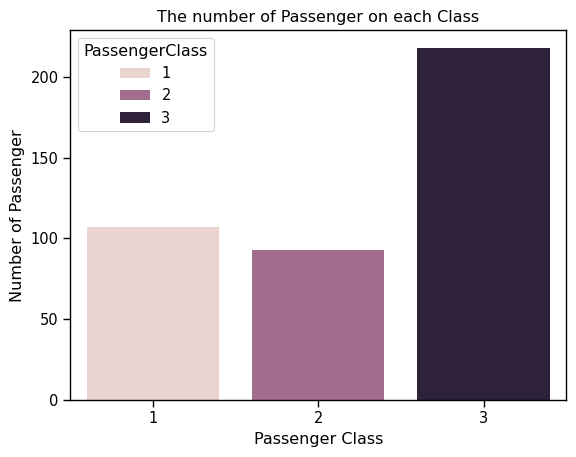

In [21]:
#Let's see how many people in different "Passenger class"
sns.countplot(data=df_copy, x='PassengerClass', hue='PassengerClass')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passenger')
plt.title('The number of Passenger on each Class')
plt.show()

In [22]:
#The number of people in Class 3 is highest.

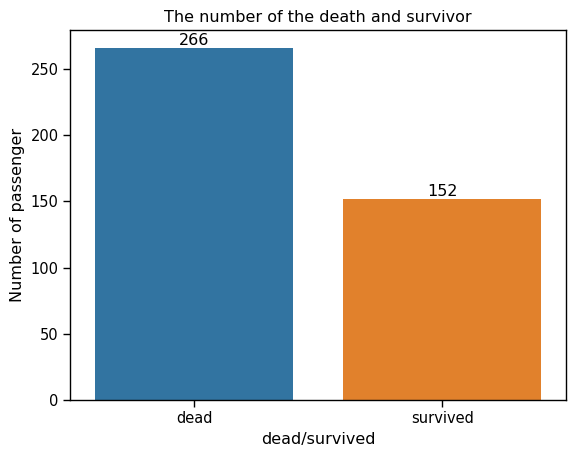

In [23]:
#Let's see how many people survived
num_dead_survive = sns.countplot(data=df_copy, x='dead/survived', hue='dead/survived')
num_dead_survive.bar_label(num_dead_survive.containers[0])
num_dead_survive.bar_label(num_dead_survive.containers[1])
plt.title('The number of the death and survivor')
plt.ylabel('Number of passenger')
plt.show()

In [24]:
num_dead = df_copy['dead/survived'].value_counts()['dead']
num_survived = df_copy['dead/survived'].value_counts()['survived']
total_pass = df_copy['PassengerId'].count()
print ('Dead : {:.3%}'.format(num_dead/total_pass))
print ('Survived : {:.3%}'.format(num_survived/total_pass))

Dead : 63.636%
Survived : 36.364%


In [25]:
#Let's see the age distribution on death
#sns.boxplot(data=df_copy, y='Age', x = 'dead/survived', hue='dead/survived')
#plt.title('The boxplot of the Age among Dead/survived')
#plt.show()

In [26]:
#The number of deceased and survivors is quite similar in distribution, with the majority being between the ages of 20 and 40.

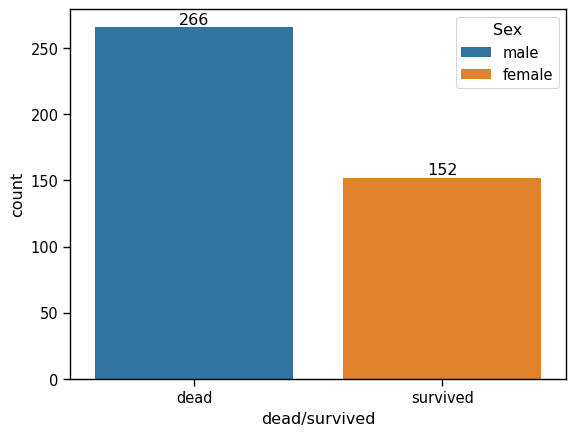

In [27]:
#The number of deaths compared to survivors is similar to the number of males and females. Let's compare how many males died/survived and how many females died/survived.
a= sns.countplot(data=df_copy, x='dead/survived', hue='Sex')
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.show()

In [28]:
#So all the males are died and all the females are survived

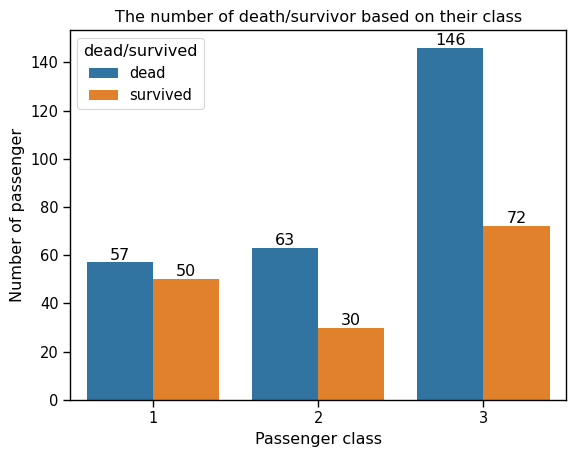

In [29]:
#Let's see how many people died/survived based on the "PassengerClass"
class_dead_survive = sns.countplot(data=df_copy, x='PassengerClass', hue='dead/survived')
class_dead_survive.bar_label(class_dead_survive.containers[0])
class_dead_survive.bar_label(class_dead_survive.containers[1])
plt.title('The number of death/survivor based on their class')
plt.xlabel('Passenger class')
plt.ylabel('Number of passenger')
plt.show()

In [30]:
#The number of dead and survived passengers in Passenger Class 1 is almost equal. Meanwhile, in Class 2 and Class 3, the number of deaths is twice the number of survivors, with Class 3 having the highest number of deaths due to the highest number of passengers.

In [31]:
#Let's look through where the passenger embarked.
#Let's count the number of passenger based on the "Port of embarkation"
port_percentage = df_copy['PortOfEmparkation'].value_counts(normalize=True)*100
print(port_percentage)

PortOfEmparkation
Southampton    64.593301
Cherbourg      24.401914
Queenstown     11.004785
Name: proportion, dtype: float64


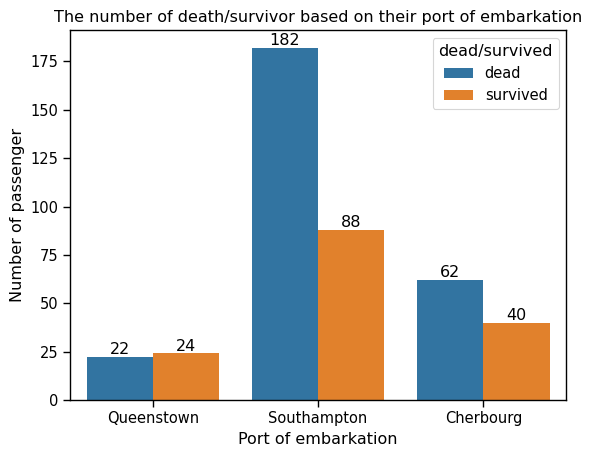

In [32]:
#Let's see which ports had the highest number of deaths.
port_vs_dead_survive = sns.countplot(data=df_copy, x='PortOfEmparkation', hue='dead/survived')
port_vs_dead_survive.bar_label(port_vs_dead_survive.containers[0])
port_vs_dead_survive.bar_label(port_vs_dead_survive.containers[1])
plt.title('The number of death/survivor based on their port of embarkation')
plt.xlabel('Port of embarkation')
plt.ylabel('Number of passenger')
plt.show()

In [33]:
#The Southampton port has the highest number of passengers, and the number of survivors is half of the deaths.

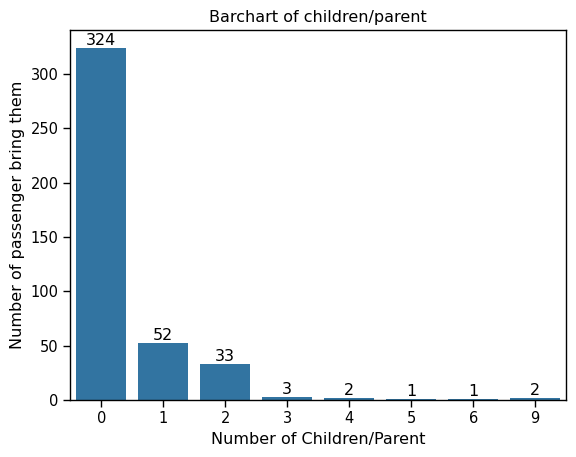

In [85]:
#Let's see the distribution of children/parent
parch_chart = sns.countplot(data=df_copy, x = 'Parch')
parch_chart.bar_label(parch_chart.containers[0])
plt.title("Barchart of children/parent")
plt.xlabel("Number of Children/Parent")
plt.ylabel("Number of passenger bring them")
plt.show()

In [ ]:
#So the number of passenger who did not bring their Children/Parents was 324.

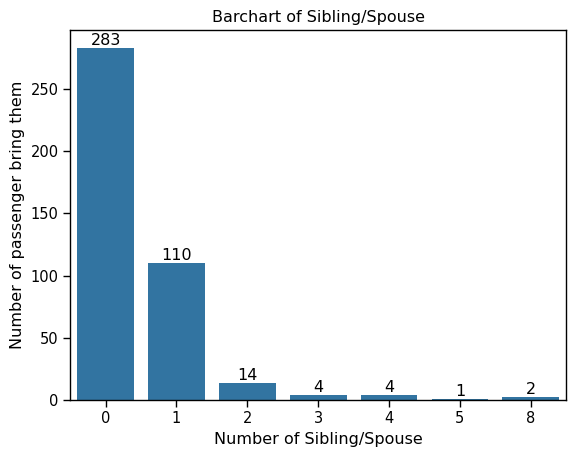

In [86]:
#Let's see the distribution of Sib/Spouse
sib_spou_chart = sns.countplot(data=df_copy, x = 'Num_Sib/Spouse')
sib_spou_chart.bar_label(sib_spou_chart.containers[0])
plt.title("Barchart of Sibling/Spouse")
plt.xlabel("Number of Sibling/Spouse")
plt.ylabel("Number of passenger bring them")
plt.show()

In [91]:
#So there was 283 passenger who did not bring any Sibling/Spouse.
#Let's see how many passengers boarded the ship alone.
num_pass_alone = 0
#Calculate the total number of passenger
total_pass = df_copy['PassengerId'].count()
#Calculate the total number of death
num_death = df_copy['Survived'].value_counts()[0]
num_death_alone = 0
for index, row in df_copy.iterrows():
    if row['Num_Sib/Spouse'] == 0 and row['Parch'] == 0:
        num_pass_alone += 1
    else:
        num_pass_alone += 0

#Let's see how many passengers who died boarded the ship alone.
for index, row in df_copy.iterrows():
    if row['Num_Sib/Spouse'] == 0 and row['Parch'] == 0 and row['Survived'] == 0:
        num_death_alone += 1
    else:
        num_death_alone += 0
print ("The number of passenger who aboarded alone is: {} - {:.3%} of total passenger - {:.3%} of total death".format(num_pass_alone, num_pass_alone/total_pass, num_death_alone/num_death))

The number of passenger who aboarded alone is: 253 - 60.526% of total passenger - 69.549% of total death


In [34]:
df_copy.head()

,PassengerId,Survived,PassengerClass,Name,Sex,Age,Num_Sib/Spouse,Parch,Ticket,Fare,Cabin,PortOfEmparkation,dead/survived
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,dead
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,survived
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown,dead
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton,dead
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton,survived


In [92]:
#Let's check how many survivors who aboard with their family.
num_survivor_fam = 0
num_survivor = df_copy['Survived'].value_counts()[1]
# Loop through each row of the DataFrame
for index, row in df_copy.iterrows():
    # Check conditions for each row
    if row['Num_Sib/Spouse'] != 0 or row['Parch'] != 0:
        if row['Survived'] != 0:
            num_survivor_fam += 1
        else:
            num_survivor_fam += 0
    elif row['Num_Sib/Spouse'] == 0 and row['Parch'] == 0:
        num_survivor_fam += 0
print("Number of people who aboard with their family: ", num_survivor_fam)
print ("Percentage of survivor who aboarded with family: ",  num_survivor_fam/num_survivor *100, "%")

Number of people who aboard with their family:  84
Percentage of survivor who aboarded with family:  55.26315789473685 %


In [89]:
#Let's check if the people who died boarded the ship with their family.
num_death_fam = 0
# Loop through each row of the DataFrame
for index, row in df_copy.iterrows():
    # Check conditions for each row
    if row['Num_Sib/Spouse'] != 0 or row['Parch'] != 0:
        if row['Survived'] == 0:
            num_death_fam += 1
        else:
            num_death_fam += 0
    elif row['Num_Sib/Spouse'] == 0 and row['Parch'] == 0:
        num_death_fam += 0
print("Number of people who aboard with their family:", num_death_fam)
print ("Percentage of survivor who aboarded with family: ",  num_death_fam/num_death *100, "%")

Number of people who aboard with their family: 81
Percentage of survivor who aboarded with family:  53.289473684210535 %


In [63]:
#Let's check some correlation between numerical columns
df_numeric = df_copy.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

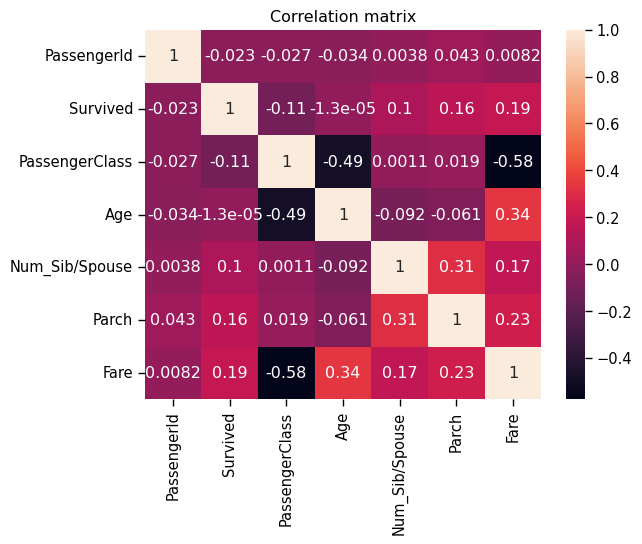

In [67]:
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation matrix")
plt.show()

In [ ]:
#There is no significant correlation between numerical columns

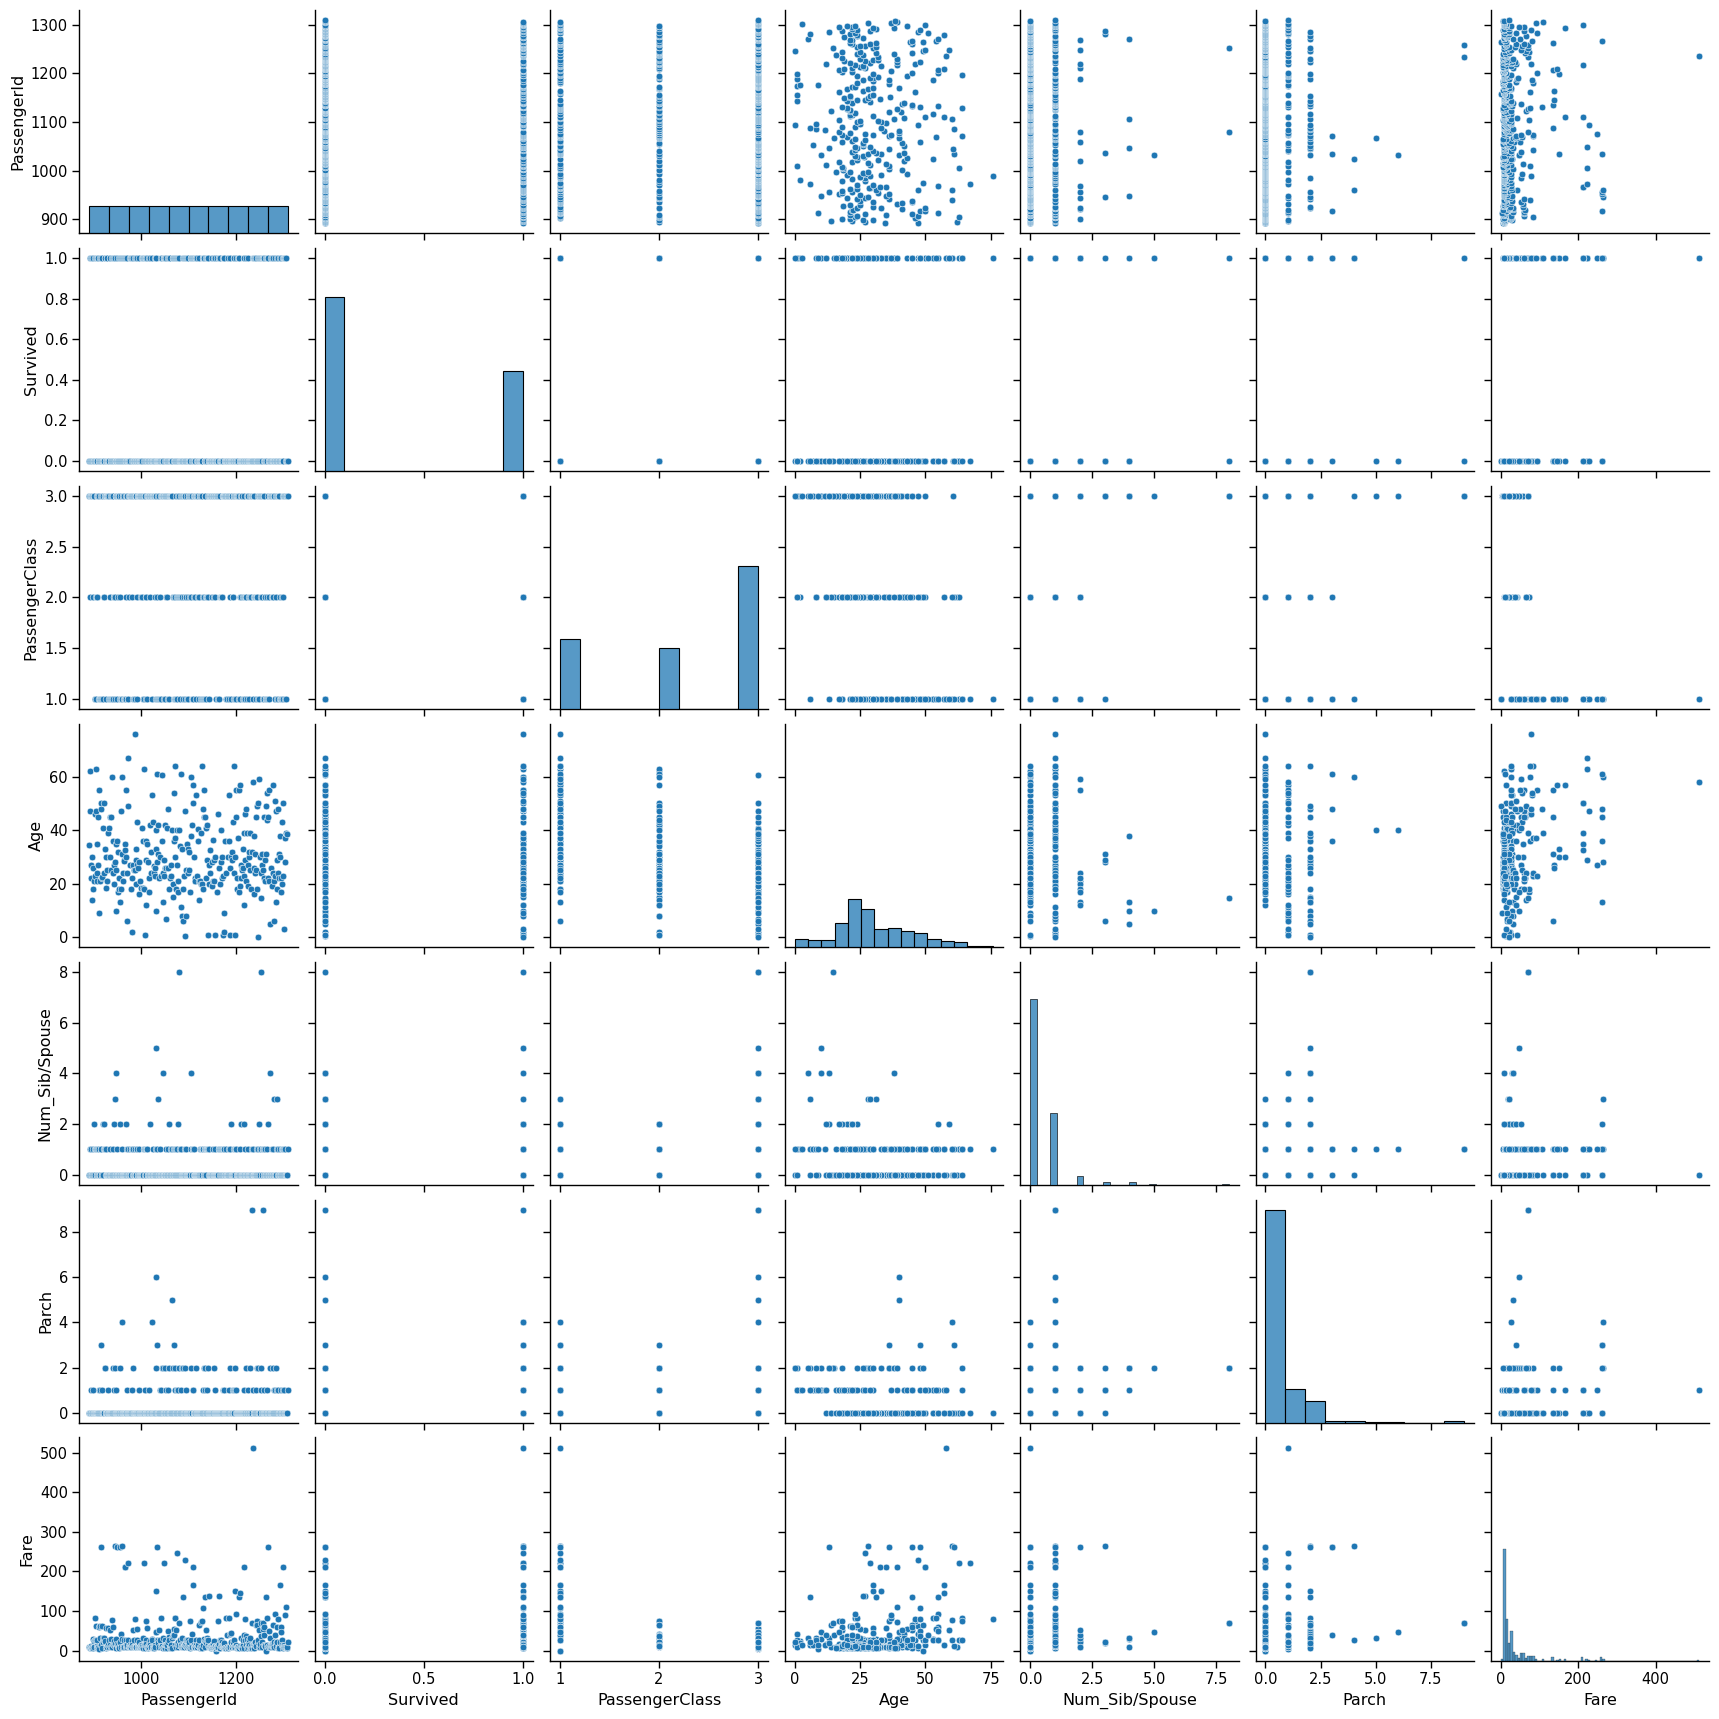

In [71]:
#Let's look through all the comparisons by using sns.pairplot()
sns.pairplot(df_copy)